In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ufcdata/preprocessed_data.csv')
df.head()

,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,...,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,Red,True,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,...,0,0,1,0,0,0,0,1,0,0
1,Red,True,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,...,0,0,1,0,0,0,0,0,1,0
2,Red,False,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,...,0,0,1,0,0,0,0,1,0,0
3,Blue,False,3,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,...,0,0,0,0,0,1,0,1,0,0
4,Blue,False,3,0.0,1.0,0.0,17.000000,14.500000,2.500000,2.000000,...,0,0,0,0,1,0,0,0,1,0


In [3]:
#Partitioning the dataset to X as predictors, and y as target
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592 entries, 0 to 3591
Columns: 160 entries, Winner to R_Stance_Switch
dtypes: bool(1), float64(134), int64(24), object(1)
memory usage: 4.4+ MB


From the results above, we can see that there are two non-numeric features, winner and title_bout. The winner will be used as taget but the title bout will remain as a predictor and will be encoded with dummy variables.

In [5]:
#Encoding the title_bout feature
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 0] = labelencoder_X_1.fit_transform(X[:, 0])

In [6]:
#Checking for proper dimensions of predictors, target and the encoding of title_bout
print("X Dimension: ",X.shape)
print()
print("y Dimension: ",y.shape)
print()
print("First row title bout value: 1 is True, 0 is False ==> ",X[0,0])
print("First row corner value: 1 is Red, 0 is Blue ==> ",y[3])
df.head()


X Dimension:  (3592, 159)

y Dimension:  (3592,)

First row title bout value: 1 is True, 0 is False ==>  1
First row corner value: 1 is Red, 0 is Blue ==>  0


,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,...,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,1,True,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,...,0,0,1,0,0,0,0,1,0,0
1,1,True,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,...,0,0,1,0,0,0,0,0,1,0
2,1,False,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,...,0,0,1,0,0,0,0,1,0,0
3,0,False,3,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,...,0,0,0,0,0,1,0,1,0,0
4,0,False,3,0.0,1.0,0.0,17.000000,14.500000,2.500000,2.000000,...,0,0,0,0,1,0,0,0,1,0


From the results above, we can see that we have properly encoded the feature

In [7]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
#keras for ANN
import keras
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [10]:
#ANN Model
classifier = Sequential()
classifier.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu', input_dim = 159))
classifier.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1,init = 'uniform', activation = 'sigmoid'))

#compiling the model
classifier.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
pred1 = classifier.fit(X_train, y_train,
              batch_size = 900,
              nb_epoch = 100)


Epoch 1/100
2873/2873 [==============================] - 0s 154us/step - loss: 0.6912 - accuracy: 0.6502
Epoch 2/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6850 - accuracy: 0.6700
Epoch 3/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6758 - accuracy: 0.6700
Epoch 4/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6614 - accuracy: 0.6700
Epoch 5/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6416 - accuracy: 0.6700
Epoch 6/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6202 - accuracy: 0.6700
Epoch 7/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6024 - accuracy: 0.6700
Epoch 8/100
2873/2873 [==============================] - 0s 6us/step - loss: 0.5941 - accuracy: 0.6700
Epoch 9/100
2873/2873 [==============================] - 0s 6us/step - loss: 0.5924 - accuracy: 0.6700
Epoch 10/100
2873/2873 [==============================] - 0s 5us/step 

In [12]:
pred1.history

{'loss': [0.691188401516995,
  0.6850431682836956,
  0.6757837968174688,
  0.6614301487663421,
  0.6416404054964041,
  0.6201655924257982,
  0.6024482564937765,
  0.5940685516610363,
  0.5924342074047345,
  0.5883915053192349,
  0.5831648094953662,
  0.5784644146559755,
  0.5751352771167509,
  0.5725053031395588,
  0.5701315955048524,
  0.5673342822861929,
  0.5645910699609012,
  0.5618786517643489,
  0.5591596884881832,
  0.5562414294163857,
  0.5534207866949525,
  0.5506475551842896,
  0.5476586472021343,
  0.5446328854793213,
  0.5412476176465383,
  0.5379010833309703,
  0.5346065150749546,
  0.5311647229521606,
  0.5278964055318929,
  0.5251219661817541,
  0.5216889720406218,
  0.5176382374149393,
  0.5142939571632229,
  0.510754936452199,
  0.5074812251642694,
  0.5037678767279636,
  0.5009169051072924,
  0.4980768898078634,
  0.49439525162347964,
  0.4918380677492578,
  0.4874725910250501,
  0.4853247158563888,
  0.48190090227243254,
  0.4782289135468533,
  0.4747379659735032,
  

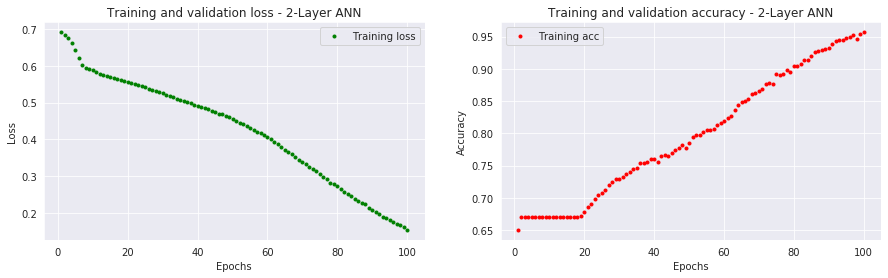

In [13]:
#Extracting CNN Results for Visualization
hist_ann = pred1.history
loss_values = hist_ann['loss']
acc_values = hist_ann['accuracy'] 


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')


plt.title('Training and validation loss - 2-Layer ANN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.title('Training and validation accuracy - 2-Layer ANN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
#plt.savefig('fight_pred1.png')
plt.show()

To ensure there is no bias or accident that the training results was really high, K-Fold will be utilize to ensure consistency of the model.

In [14]:
# #K-Fold validation model
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import cross_val_score

In [15]:
# #function to introduce model training in keras with sklearn k-fold
# def build_predictor():
#     #ANN Model
#     predictor = Sequential()
#     predictor.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu', input_dim = 159))
#     predictor.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu'))
#     predictor.add(Dense(output_dim = 1,init = 'uniform', activation = 'sigmoid'))

#     #compiling the model
#     predictor.compile(optimizer = 'adam',
#                       loss = 'binary_crossentropy',
#                       metrics = ['accuracy'])
#     return predictor

In [16]:
# classifier_sk = KerasClassifier(build_fn = build_predictor, batch_size = 900, epochs = 100)

In [17]:
# accuracies = cross_val_score(estimator = classifier_sk,
#                              X = X_train,
#                              y = y_train,
#                              cv = 10)

In [18]:
# plt.plot(range(1,11),accuracies)
# plt.xlabel('Fold Iteration')
# plt.title("K-Fold Cross Validation Accuracy")
# #plt.savefig("ann_k_fold.png")
# plt.show()

In [19]:
# accuracies

In [20]:
#GridSearch validation model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [21]:
#function to introduce model training in keras with Gridsearch
def build_classifier(optimizer):
    #ANN Model
    classifier = Sequential()
    classifier.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu', input_dim = 159))
    classifier.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu'))
    classifier.add(Dense(output_dim = 1,init = 'uniform', activation = 'sigmoid'))

    #compiling the model
    classifier.compile(optimizer = optimizer,
                      loss = 'binary_crossentropy',
                      metrics = ['accuracy'])
    return classifier

In [22]:
classifier_sk = KerasClassifier(build_fn = build_classifier)

In [23]:
#Parameters for GridSearch
params = {'batch_size':[25,32],
          'epochs': [100,500],
          'optimizer': ['adam','rmsprop']
         }

In [24]:
#GridSearch for ANN
grid_search = GridSearchCV(estimator=classifier_sk,
                          param_grid = params,
                          scoring='accuracy',
                          cv = 10)

In [25]:
#training for gridsearch
grid = grid_search.fit(X_train,y_train)
best_params = grid.best_params_
best_accuracy = grid.best_score_

Epoch 1/100
2585/2585 [==============================] - 0s 143us/step - loss: 0.6239 - accuracy: 0.6627
Epoch 2/100
2585/2585 [==============================] - 0s 110us/step - loss: 0.5767 - accuracy: 0.6723
Epoch 3/100
2585/2585 [==============================] - 0s 101us/step - loss: 0.5631 - accuracy: 0.6801
Epoch 4/100
2585/2585 [==============================] - 0s 98us/step - loss: 0.5483 - accuracy: 0.7141
Epoch 5/100
2585/2585 [==============================] - 0s 102us/step - loss: 0.5321 - accuracy: 0.7319
Epoch 6/100
2585/2585 [==============================] - 0s 98us/step - loss: 0.5119 - accuracy: 0.7455
Epoch 7/100
2585/2585 [==============================] - 0s 102us/step - loss: 0.4948 - accuracy: 0.7644
Epoch 8/100
2585/2585 [==============================] - 0s 103us/step - loss: 0.4773 - accuracy: 0.7830
Epoch 9/100
2585/2585 [==============================] - 0s 106us/step - loss: 0.4541 - accuracy: 0.7954
Epoch 10/100
2585/2585 [==============================] -

ValueError: unknown is not supported

In [26]:
grid_search

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fd00f8c1748>,
             iid='warn', n_jobs=None,
             param_grid={'batch_size': [25, 32], 'epochs': [100, 500],
                         'optimizer': ['adam', 'rmsprop']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)